<a href="https://colab.research.google.com/github/BrightLaw9/Restaurant_Business_Analysis/blob/main/RestaurantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.preprocessing import normalize
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

import seaborn as sn
import IPython


In [ ]:
data = pd.read_json("/content/drive/My Drive/yelp_academic_dataset_business.json", lines=True)
data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


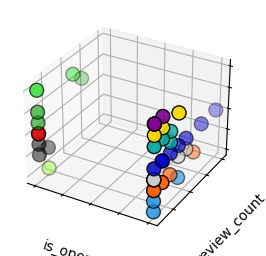

In [23]:
att = data["attributes"]
deliver = data.loc[att == {"RestaurantsDelivery":"True"}]

x = deliver["review_count"]
y = deliver["stars"]
kmeans = KMeans(n_clusters=12) # change the number here to change the amount of cluster we're looking for
kmeans.fit(deliver[["stars", "is_open"]].to_numpy())
y_kmeans = kmeans.predict(deliver[["stars", "is_open"]].to_numpy())
X = normalize(deliver[["is_open", "review_count", "stars"]].to_numpy(), axis=0, norm='max')
fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=3, azim=270)
#print(y_kmeans)
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y_kmeans, [x for x in range(11)]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=100, c=y_kmeans, cmap=plt.cm.nipy_spectral,
            edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel('is_open')
ax.set_ylabel('review_count')
ax.set_zlabel('stars')

plt.show()

In [33]:
# A list of restaurants that provide delivery services during the pandemic

atts = data['attributes']
can_deliver = []

count = 0

for business_att_dict in atts:
  if business_att_dict != None and "RestaurantsDelivery" in business_att_dict.keys() and business_att_dict["RestaurantsDelivery"] == 'True':
    can_deliver.append(data[count:count+1])
    #print(data[count:count+1])
  count += 1

can_deliver

[              business_id                 name         address       city  \
 8  pQeaRpvuhoEqudo3uymHIQ  The Empanadas House  404 E Green St  Champaign   
 
   state postal_code   latitude  longitude  stars  review_count  is_open  \
 8    IL       61820  40.110446 -88.233073    4.5             5        1   
 
                                           attributes  \
 8  {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
 
                                           categories  \
 8  Ethnic Food, Food Trucks, Specialty Food, Impo...   
 
                                                hours  
 8  {'Monday': '11:30-14:30', 'Tuesday': '11:30-14...  ,
                business_id               name                  address   city  \
 17  nIEhsGbw0vJuYl05bzzj6Q  Bloom & Blueprint  2115 E Cedar St, Unit 3  Tempe   
 
    state postal_code   latitude   longitude  stars  review_count  is_open  \
 17    AZ       85281  33.411514 -111.895378    4.5             7        1   
 
                   

In [47]:
# Calculate mean of restaurant star rating that is open vs closed

atts = data['attributes']
stars = data['stars']
is_open = data['is_open']

count = 0
o_res_count = 0
c_res_count = 0
open_mean = 0
close_mean = 0
for business_att_dict in atts:
  if business_att_dict != None and "RestaurantsDelivery" in business_att_dict.keys():
    if is_open[count] == 1:
      open_mean += stars[count]
      o_res_count += 1
    elif is_open[count] == 0:
      close_mean += stars[count]
      c_res_count += 1
  count += 1

open_mean /= o_res_count
close_mean /= c_res_count

print(f"Open star mean is: {open_mean}")
print(f"Close star mean is: {close_mean}")

Open star mean is: 3.4777097902097904
Close star mean is: 3.4407716809904443


In [ ]:
data.head(50)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': '{'garage': False, 'street...","Dry Cleaning & Laundry, Local Services, Laundr...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
7,ScYkbYNkDgCneBrD9vqhCQ,Junction Tire & Auto Service,6910 E Southern Ave,Mesa,AZ,85209,33.393885,-111.682226,5.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Auto Repair, Oil Change Stations, Automotive, ...","{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'..."
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."


In [ ]:
df = pd.DataFrame()

In [ ]:
# A list of operating hour trends
l = []
for i in data["hours"]:
  if i == None:
    continue
  l.append(i.values())
l

[dict_values(['10:0-18:0', '11:0-20:0', '10:0-18:0', '11:0-20:0', '11:0-20:0', '11:0-20:0', '13:0-18:0']),
 dict_values(['7:0-16:00', '7:0-16:0', '7:0-16:0', '7:0-16:0', '7:0-16:0']),
 dict_values(['0:0-0:00', '9:0-16:0', '9:0-16:0', '9:0-16:0', '9:0-16:0']),
 dict_values(['7:0-18:00', '7:0-18:0', '7:0-18:0', '7:0-18:0', '7:0-18:0', '7:0-15:0']),
 dict_values(['7:0-19:00', '7:0-19:0', '7:0-19:0', '7:0-19:0', '7:0-19:0', '9:0-17:0']),
 dict_values(['7:30-17:00', '7:30-17:0', '7:30-17:0', '7:30-17:0', '7:30-17:0', '7:30-13:0']),
 dict_values(['11:30-14:30', '11:30-14:30', '11:30-14:30', '11:30-14:30', '11:30-14:30']),
 dict_values(['5:30-23:0', '5:30-23:0', '5:30-23:0', '5:30-23:0', '5:30-23:0', '8:0-19:0', '8:0-17:0']),
 dict_values(['7:0-17:0', '7:0-17:0', '7:0-17:0', '7:0-17:0', '7:0-17:0', '7:0-17:0']),
 dict_values(['8:0-17:0', '8:0-17:0', '8:0-17:0', '8:0-17:0', '8:0-17:0']),
 dict_values(['0:0-0:0', '11:0-21:0', '11:0-21:0', '11:0-21:0', '11:0-22:0', '11:0-22:0', '11:0-21:0']),
 d

In [ ]:
a = 0
hours_list = []
result = 0
def calc_day_hrs(day):
   if i[day] == True:
    result += int(i[day][5:7]) - int(i[day][0:2])
l = []
for i in data["hours"]:
  if i == None:
    l.append(None)
    continue
  l.append(list(i.values()))

for a in l:
  for b in range(len(a)):
    a[b]


    # b += 1
#for a in l:
 # print(a[])
  #if a == None:
  #  continue
    # hours_list.append(None)
 # elif i["Monday"][1:2] == ":":
    #i["Monday"] += "0"
      #if i["Monday"] = True:
        #finish = i["Monday"][5:7]
        #start = i["Monday"][0:2]
        #result = int(finish) - int(start)
    #hours_list.append(result)
#hours_list

TypeError: ignored

,hours
0,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,None
2,None
3,"{'Monday': '7:0-16:00', 'Tuesday': '7:0-16:0',..."
4,"{'Monday': '0:0-0:00', 'Tuesday': '9:0-16:0', ..."
...,...
209388,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209389,None
209390,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
209391,"{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."


In [38]:
data.describe()
favRestr = data.loc[data["name"] == "Congee Queen"]
favScore = favRestr["stars"].mean()
print(f"Mean stars for Congee Queen is: {favScore}")

Mean stars for Congee Queen is: 3.75


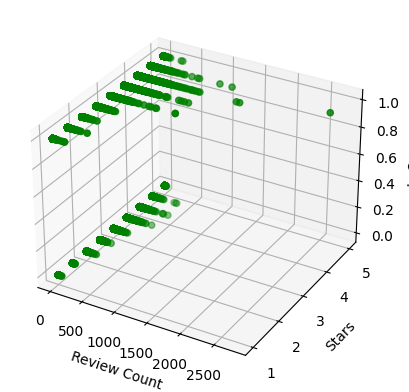

In [46]:
# Analysis of ON restaurants -- sorted in ascending order and displayed graphically
state = data["state"]
onRestr = data.loc[state == "ON"]
top = onRestr.sort_values(by=["stars", "review_count"], ascending=[False, False])
x = top['review_count']
y = top['stars']
z = top['is_open']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, color="green")
ax.set_xlabel("Review Count")
ax.set_ylabel("Stars")
ax.set_zlabel("Is Open")

plt.show()